# Data


In [1]:
# import 
import pandas as pd


# Data Selection and Reshaping

In [2]:
# read file
df = pd.read_csv("U.S._Chronic_Disease_Indicators_20250919.csv")
# df.head(5)
# df.columns
# df['Topic'].unique()

/var/folders/z0/lhb5k9bs2gj7g9s2568tgpv00000gn/T/ipykernel_82616/30423582.py:2: DtypeWarning: Columns (10,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("U.S._Chronic_Disease_Indicators_20250919.csv")


## 1. Select Relevant Columns

We are only interested in a subset of variables. Select the following variables and remove all others:

**Binge Drinking:**
Binge drinking prevalence among high school students (overall, males, females), in crude prevalence percentages.

**Poverty:**
Living below 150% of the poverty threshold among all people, Crude Prevalence in Percent (overall only).
Hint: Use the Topic and Question columns to identify the relevant indicators. You may need to filter by specific text patterns or use string matching methods. You'll need to use the Stratification1 column to separate overall, male, and female data.

Hint: Use the Topic and Question columns to identify the relevant indicators. You may need to filter by specific text patterns or use string matching methods. You'll need to use the Stratification1 column to separate overall, male, and female data.

In [29]:
new_df = df[["LocationDesc", "LocationAbbr", "YearEnd", "Topic", "Question", "Stratification1", "DataValue", "DataValueType", "DataValueUnit"]]

# Binge drinking prevalence among high school students (overall, males, females), in crude prevalence percentages.

binge_df = new_df[(new_df["Question"] == "Binge drinking prevalence among high school students") &
                  (new_df["Stratification1"].isin(["Overall", "Male", "Female"])) &
                  (new_df["DataValueType"] == "Crude Prevalence") &
                   (new_df["DataValueUnit"] == "%")
]

binge_df.head(5)

,LocationDesc,LocationAbbr,YearEnd,Topic,Question,Stratification1,DataValue,DataValueType,DataValueUnit
155,Kansas,KS,2019,Alcohol,Binge drinking prevalence among high school st...,Female,18.6,Crude Prevalence,%
667,Idaho,ID,2021,Alcohol,Binge drinking prevalence among high school st...,Male,9.6,Crude Prevalence,%
15308,Alabama,AL,2019,Alcohol,Binge drinking prevalence among high school st...,Male,9.4,Crude Prevalence,%
15354,Arizona,AZ,2019,Alcohol,Binge drinking prevalence among high school st...,Overall,14.7,Crude Prevalence,%
15868,California,CA,2019,Alcohol,Binge drinking prevalence among high school st...,Male,6.1,Crude Prevalence,%


In [30]:

# Living below 150% of the poverty threshold among all people, Crude Prevalence in Percent (overall only)
poverty_df = new_df[(new_df["Question"] == "Living below 150% of the poverty threshold among all people") &
                    (new_df["Stratification1"] == "Overall") &
                     (new_df["DataValueType"] == "Crude Prevalence") &
                    (new_df["DataValueUnit"] == "%")
]

poverty_df.head(5)


,LocationDesc,LocationAbbr,YearEnd,Topic,Question,Stratification1,DataValue,DataValueType,DataValueUnit
15515,Arkansas,AR,2019,Social Determinants of Health,Living below 150% of the poverty threshold amo...,Overall,27.8,Crude Prevalence,%
18668,Alaska,AK,2019,Social Determinants of Health,Living below 150% of the poverty threshold amo...,Overall,17.7,Crude Prevalence,%
21571,Arizona,AZ,2019,Social Determinants of Health,Living below 150% of the poverty threshold amo...,Overall,21.9,Crude Prevalence,%
26877,Alabama,AL,2019,Social Determinants of Health,Living below 150% of the poverty threshold amo...,Overall,25.4,Crude Prevalence,%
32066,Hawaii,HI,2019,Social Determinants of Health,Living below 150% of the poverty threshold amo...,Overall,14.6,Crude Prevalence,%


## 2. Reshape the Data

Convert the dataset from long format to wide format using appropriate pandas commands. Ensure you have the correct columns and rename them as follows:

state: Name of the State
stateabb: State Abbreviation
year: Year of observation
binge_all: Binge drinking prevalence (all students)
binge_male: Binge drinking prevalence (male students)
binge_female: Binge drinking prevalence (female students)
poverty: Poverty prevalence (overall population)
Hint: Use the pivot command to change from long to wide.

In [36]:
# convert binge to wide format
binge_wide = binge_df.pivot(index=["LocationDesc", "LocationAbbr", "YearEnd"], columns= "Stratification1", values="DataValue")

#rename column names
binge_wide.rename(columns={"Overall": "binge_all", "Male": "binge_male", "Female": "binge_female"}, inplace=True)

# binge_wide

In [35]:

# convert poverty to wide format
poverty_wide = poverty_df.pivot(index=["LocationDesc", "LocationAbbr", "YearEnd"], columns= "Stratification1", values="DataValue")
#rename column names
poverty_wide.rename(columns={"Overall": "poverty"}, inplace=True)

# poverty_wide


In [34]:
# merge 2 datasets
df_wide = binge_wide.merge(poverty_wide, on=["LocationDesc", "LocationAbbr", "YearEnd"], how="left").reset_index()
df_wide.rename(columns={"LocationDesc": "state", "LocationAbbr": "stateabb", "YearEnd": "year"}, inplace=True)
df_wide

Stratification1,state,stateabb,year,binge_female,binge_male,binge_all,poverty
0,Alabama,AL,2019,10.5,9.4,10,25.4
1,Alabama,AL,2021,NaN,NaN,NaN,25.8
2,Alaska,AK,2019,15.2,10.5,13.1,17.7
3,Alaska,AK,2021,NaN,NaN,NaN,16.7
4,Arizona,AZ,2019,15.8,13.4,14.7,21.9
...,...,...,...,...,...,...,...
105,West Virginia,WV,2021,11.8,12.7,12.2,27.6
106,Wisconsin,WI,2019,NaN,NaN,NaN,16.9
107,Wisconsin,WI,2021,NaN,NaN,NaN,17.8
108,Wyoming,WY,2019,NaN,NaN,NaN,16.9


## 3. Summary of the Cleaned Data

Provide an overview of the cleaned dataset by printing:

The shape of the data (shape)

Summary statistics (describe)

Data types of each column (dtypes)

Number of missing values per column (isnull().sum())

In [5]:
# shape of data
print(df_wide.shape)

# summary statistics
print(df_wide.describe())

# data type for each column
print(df_wide.dtypes)

# number of missing values
print(df_wide.isnull().sum())

(110, 7)
Stratification1         year
count             110.000000
mean             2020.000000
std                 1.004577
min              2019.000000
25%              2019.000000
50%              2020.000000
75%              2021.000000
max              2021.000000
Stratification1
state           object
stateabb        object
year             int64
binge_female    object
binge_male      object
binge_all       object
poverty         object
dtype: object
Stratification1
state            0
stateabb         0
year             0
binge_female    20
binge_male      20
binge_all       20
poverty          6
dtype: int64


## 4. Save Cleaned Data

Save the final dataset as binge_cleaned.csv. This file should be submitted with your assignment.

In [37]:
# save final dataset to csv file
df_wide.to_csv('binge_cleaned.csv')

# Data Transformation and Analysis


In [54]:
# import binge cleaned file
binge_cleaned = pd.read_csv("binge_cleaned.csv")
binge_cleaned= binge_cleaned.drop(binge_cleaned.columns[0], axis=1)
binge_cleaned

,state,stateabb,year,binge_female,binge_male,binge_all,poverty
0,Alabama,AL,2019,10.5,9.4,10.0,25.4
1,Alabama,AL,2021,NaN,NaN,NaN,25.8
2,Alaska,AK,2019,15.2,10.5,13.1,17.7
3,Alaska,AK,2021,NaN,NaN,NaN,16.7
4,Arizona,AZ,2019,15.8,13.4,14.7,21.9
...,...,...,...,...,...,...,...
105,West Virginia,WV,2021,11.8,12.7,12.2,27.6
106,Wisconsin,WI,2019,NaN,NaN,NaN,16.9
107,Wisconsin,WI,2021,NaN,NaN,NaN,17.8
108,Wyoming,WY,2019,NaN,NaN,NaN,16.9


## 1. Top 10 States for Binge Drinking

For the most recent year in the dataset, create a table showing the top 10 U.S. states with the highest overall high school binge drinking prevalence. Include binge drinking rates for males, females, and the overall student population. Sort by the overall student binge drinking rate.

In [55]:
# make sure its US states
states50 = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD",
    "MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC",
    "SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"}

binge_cleaned = binge_cleaned[binge_cleaned["stateabb"].isin(states50)]




In [57]:
# top 10 state for binge drinking
top_10 = binge_cleaned[binge_cleaned["year"]==binge_cleaned["year"].max()]
binge_top10 = top_10[['state', 'year','binge_female','binge_male', 'binge_all']].sort_values("binge_all", ascending=False).head(10)

binge_top10

,state,year,binge_female,binge_male,binge_all
55,Montana,2021,17.6,15.3,16.4
63,New Jersey,2021,13.6,16.3,15.2
21,Georgia,2021,16.6,12.2,14.3
53,Missouri,2021,15.7,12.7,14.1
71,North Dakota,2021,14.5,13.6,14.0
11,Colorado,2021,13.6,14.4,13.8
89,Tennessee,2021,17.4,9.3,13.4
35,Kansas,2021,12.0,13.7,13.3
91,Texas,2021,14.1,12.4,13.2
75,Oklahoma,2021,14.7,11.7,13.1


## 2. Annual Growth Rates in Binge Drinking
Calculate the average annual growth rate of binge drinking prevalence (for the overall student population) across states, over the available years.

One way to calculate growth rates:

Use groupby to group by state.
Use the first() and last() functions to find the first and last available data points for each state.
Calculate the percentage change and divide it by the number of years in the dataset, or use pct_change() to simplify the process.
Provide a table showing the 5 states with the largest increases and the 5 states with the largest decreases in binge drinking prevalence over the time period.

In [60]:
# group dataset by state then find first and last data for each state
first_year = binge_cleaned[[ 'state', 'year', 'binge_all']].groupby('state').first()
last_year = binge_cleaned[[ 'state', 'year', 'binge_all']].groupby('state').last()

# merge data set
annual_growth = first_year.merge(last_year, left_index=True, right_index=True, suffixes=("_start","_end")).reset_index()
annual_growth


,state,year_start,binge_all_start,year_end,binge_all_end
0,Alabama,2019,10.0,2021,10.0
1,Alaska,2019,13.1,2021,13.1
2,Arizona,2019,14.7,2021,11.3
3,Arkansas,2019,12.2,2021,9.6
4,California,2019,7.1,2021,7.1
5,Colorado,2019,13.1,2021,13.8
6,Connecticut,2019,12.9,2021,7.0
7,Delaware,2019,8.4,2021,8.4
8,Florida,2019,12.4,2021,12.2
9,Georgia,2019,6.2,2021,14.3


In [43]:
#calculate average annual growth rate
annual_growth["years"] = (annual_growth["year_end"] - annual_growth["year_start"])
annual_growth["avg_annual_growth"] = ((annual_growth['binge_all_end'] - annual_growth['binge_all_start'])/annual_growth['binge_all_start']) * 100 / annual_growth['years']


In [44]:
# top 5 states with largest increase 
top5_increase = annual_growth.sort_values("avg_annual_growth", ascending=False).head(5)
top5_increase


,state,year_start,binge_all_start,year_end,binge_all_end,years,avg_annual_growth
9,Georgia,2019,6.2,2021,14.3,2,65.322581
41,Tennessee,2019,8.8,2021,13.4,2,26.136364
12,Illinois,2019,10.1,2021,11.6,2,7.425743
42,Texas,2019,11.5,2021,13.2,2,7.391304
26,Nebraska,2019,8.2,2021,9.1,2,5.487805


In [45]:
# top 5 states with largest decrease
top5_decrease = annual_growth.sort_values("avg_annual_growth", ascending=True).head(5)
top5_decrease


,state,year_start,binge_all_start,year_end,binge_all_end,years,avg_annual_growth
6,Connecticut,2019,12.9,2021,7.0,2,-22.868217
21,Michigan,2019,11.2,2021,6.8,2,-19.642857
30,New Mexico,2019,12.1,2021,8.1,2,-16.528926
15,Kansas,2019,18.8,2021,13.3,2,-14.627660
11,Idaho,2019,15.9,2021,11.7,2,-13.207547


## 3. Data Quality Assessment

Assess the quality of your cleaned dataset by:

Identifying states with missing data for any year
Calculating the percentage of complete observations for each state
Creating a summary table showing data completeness by state and year


In [25]:
# state with missing data for any year

state_with_na = binge_cleaned[binge_cleaned.isna().any(axis=1)]
state_with_na


,state,stateabb,year,binge_female,binge_male,binge_all,poverty
1,Alabama,AL,2021,NaN,NaN,NaN,25.8
3,Alaska,AK,2021,NaN,NaN,NaN,16.7
9,California,CA,2021,NaN,NaN,NaN,20.0
14,Delaware,DE,2019,NaN,NaN,NaN,17.3
22,Guam,GU,2019,8.6,7.9,8.2,NaN
23,Guam,GU,2021,NaN,NaN,NaN,NaN
30,Indiana,IN,2019,NaN,NaN,NaN,20.9
40,Maine,ME,2019,NaN,NaN,NaN,18.6
41,Maine,ME,2021,NaN,NaN,NaN,18.9
48,Minnesota,MN,2019,NaN,NaN,NaN,15.1


In [63]:
# Calculating the percentage of complete observations for each state

df = binge_cleaned.copy()
df['complete'] = df.notna().all(axis=1)   
pct_complete = df.groupby(['state'])['complete'].mean() * 100
pct_complete.reset_index(name='pct_complete')


,state,pct_complete
0,Alabama,50.0
1,Alaska,50.0
2,Arizona,100.0
3,Arkansas,100.0
4,California,50.0
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,50.0
8,Florida,100.0
9,Georgia,100.0


In [64]:
# Creating a summary table showing data completeness by state and year

completness = df.groupby(['state', 'year'])['complete'].mean() * 100
completness.reset_index(name='completness')

,state,year,completness
0,Alabama,2019,100.0
1,Alabama,2021,0.0
2,Alaska,2019,100.0
3,Alaska,2021,0.0
4,Arizona,2019,100.0
...,...,...,...
95,West Virginia,2021,100.0
96,Wisconsin,2019,0.0
97,Wisconsin,2021,0.0
98,Wyoming,2019,0.0


## 4. Visualization (Optional Bonus

Create at least one meaningful visualization that helps understand the data:

A map showing binge drinking rates by state for the most recent year
A time series plot showing trends for a few selected states
A scatter plot showing the relationship between poverty and binge drinking rates

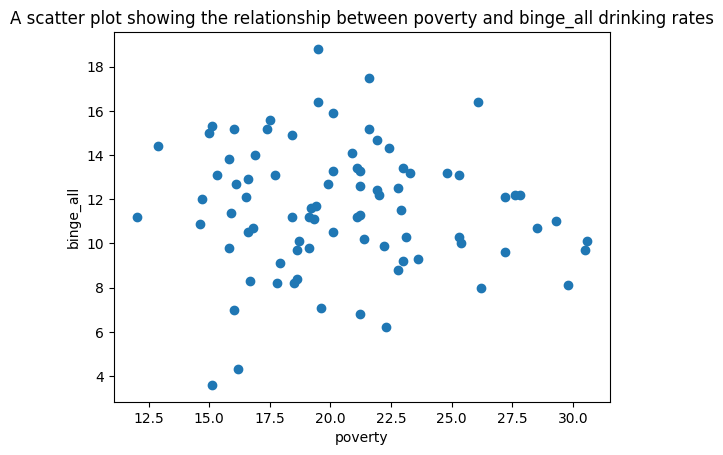

In [68]:
# A scatter plot showing the relationship between poverty and binge drinking rates

import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(x=df["poverty"], y=df["binge_all"])
plt.xlabel("poverty")
plt.ylabel("binge_all")
plt.title("A scatter plot showing the relationship between poverty and binge_all drinking rates")

plt.show()
